
Aplique FFT em todos os sinais gerados na lista 1, e faça o gráfico de cada um deles.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

seconds = 1
fs=1000
t = np.arange(0, seconds, 1.0/fs)

def gen_signal(freq, A=1, phi=0):
    return A*np.sin(2*np.pi*freq*t + phi)

def plot_signal(signal, title=''):
    plt.figure(figsize=(15, 3))
    limit = max(signal)*1.1
    limit = 1 if limit < 1 else limit
    plt.ylim(top=limit, bottom=-limit)
    plt.xlabel('time')
    plt.ylabel('amplitude')
    plt.title(title)
    plt.plot(t, signal, scaley=False)

def plot_fft(y):
    """
    Plot fft for a given signal
    
    Adapted from: https://plot.ly/matplotlib/fft/
    """
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/fs
    frq = k/T # two sides frequency range
    frq = frq[:n//2] # one side frequency range

    Y = np.fft.fft(y)/(n/2) # fft computing and normalization
    Y = Y[:n//2]

    fig, ax = plt.subplots(2, 1, figsize=(15,4))

    time_lim = max(y)*1.1
    time_lim = 1 if time_lim < 1 else time_lim
    ax[0].plot(t,y, scaley=False)
    ax[0].set_xlabel('Time')
    ax[0].set_ylim([-time_lim, time_lim])
    ax[0].set_ylabel('Amplitude')

    freq_lim = max(abs(Y))*1.1
    freq_lim = 1 if freq_lim < 1 else freq_lim
    ax[1].plot(frq,abs(Y),'r', scaley=False) # plotting the spectrum
    ax[1].set_ylim([0, freq_lim])
    ax[1].set_xlabel('Freq (Hz)')
    ax[1].set_ylabel('|Y(freq)|')

In [2]:
frequencies = [1, 5, 10, 50, 100]
signals = [gen_signal(f) for f in frequencies]

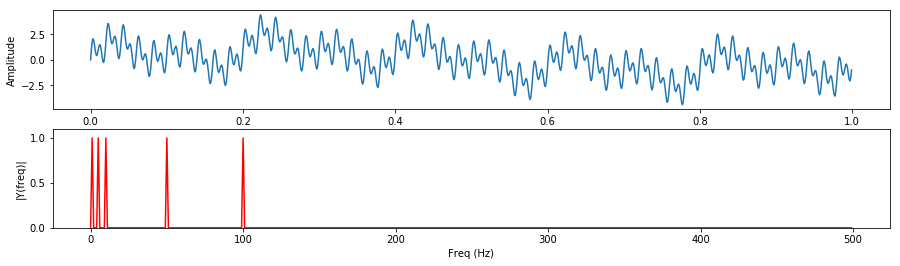

In [3]:
sig = sum(signals)
plot_fft(sig)

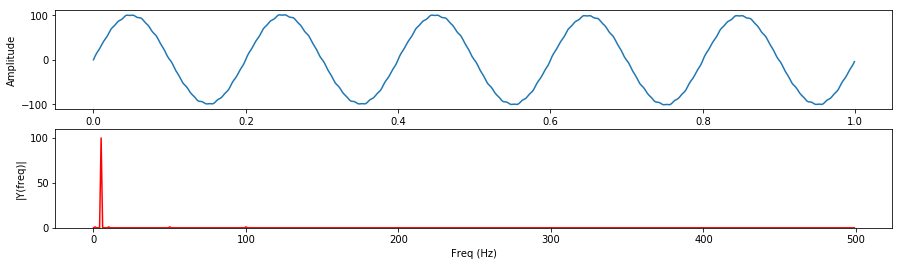

In [4]:
new_signals = [s[:] for s in signals]
new_signals[1] = new_signals[1]*100
sig = sum(new_signals)
plot_fft(sig)

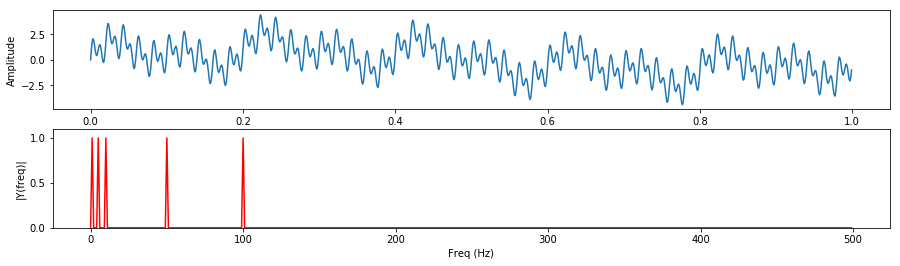

In [5]:
new_signals = [s[:] for s in signals]
new_signals[4] = new_signals[4]*100
sig = sum(signals)
plot_fft(sig)

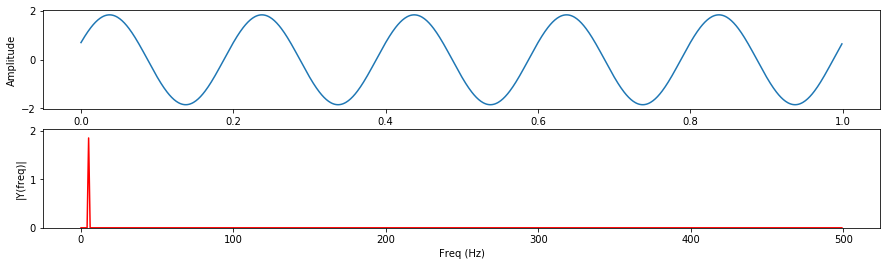

In [6]:
sig_b = gen_signal(freq=5)
sig_f = gen_signal(freq=5, phi=np.pi/4)
sig = sum([sig_b, sig_f])
plot_fft(sig)

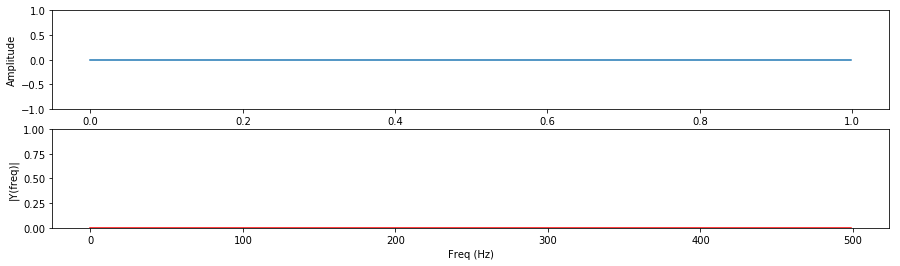

In [7]:
sig_b = gen_signal(freq=5)
sig_g = gen_signal(freq=5, phi=np.pi)
sig = sum([sig_b, sig_g])
plot_fft(sig)

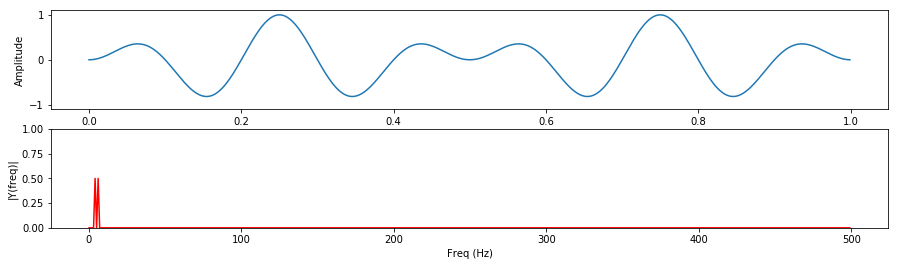

In [8]:
sig = signals[0]*signals[1]
plot_fft(sig)

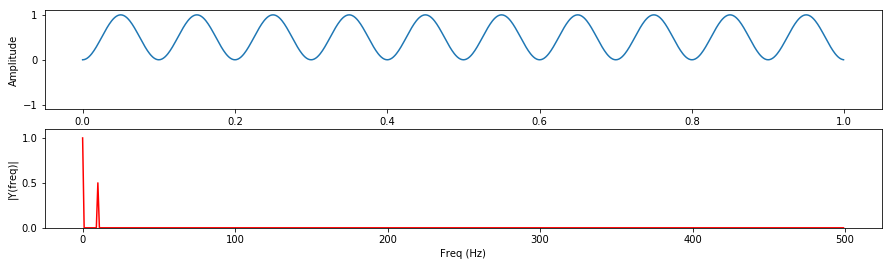

In [9]:
sig = signals[1]*signals[1]
plot_fft(sig)